# Dangerous Rallies
Thesis: After short-term (24hr span) rallies for BTC/ETH (+~5%), alts spike dangerously

In [319]:
import binance_helpers as bh
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import model as m
import ui
import importlib
import time
from datetime import datetime, timedelta
client = bh.new_binance_client()
importlib.reload(m)
from downloader import Downloader
dl = Downloader()

In [320]:
btc = dl.get_timeseries_data("BTCUSDT")

In [374]:
trades = pd.read_csv("data/tradesr.csv", index_col=0, parse_dates=True)
trades = trades.iloc[-5000:]

In [375]:
trades2 = pd.read_csv("data/tradesodd.csv", index_col=0, parse_dates=True)
trades2 = trades2.iloc[-5000:]

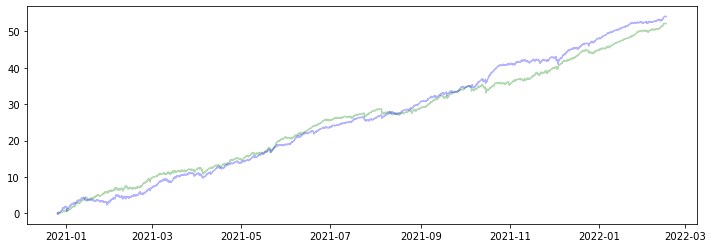

In [376]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(trades.target.cumsum(), alpha=0.3, color="green")
ax.plot(trades2.target.cumsum(), alpha=0.3, color="blue")


<AxesSubplot:xlabel='timestamp'>

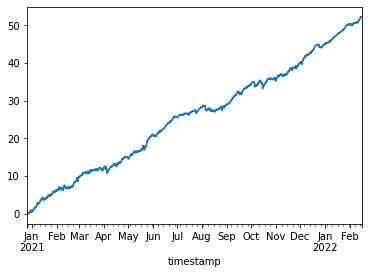

In [370]:
trades.target.cumsum().plot()

In [360]:
t = trades[trades.result<-0.1]

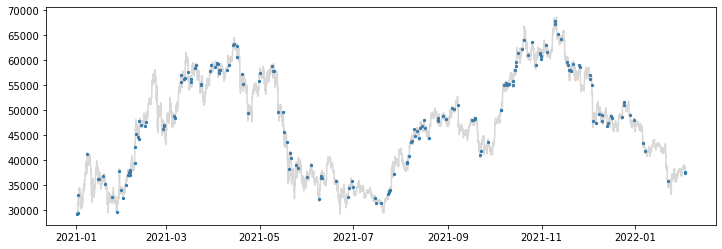

In [361]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(btc.loc[t.index[0]:t.index[-1]].close, alpha=0.3, color="gray")
ax.scatter(t.index, btc.reindex(t.index).close, s=5)

,trades,pret,target,result
timestamp,,,,
2020-12-26 06:00:00,mith,0.079646,-0.057008,-0.082914
2020-12-27 00:00:00,mith,0.091428,-0.251531,-0.086944
2020-12-27 12:00:00,mith,0.091116,-0.138984,-0.051863
2020-12-30 04:00:00,mith,0.127315,-0.060010,-0.069050
2020-12-30 18:00:00,og,0.133953,-0.213567,-0.079320
...,...,...,...,...
2022-02-09 10:00:00,slp,0.123249,-0.093656,-0.084452
2022-02-10 14:00:00,slp,0.073808,-0.089377,-0.069015
2022-02-10 16:00:00,bnx,0.106619,-0.062673,-0.078297


In [223]:
green = pd.read_csv("data/green.csv", index_col=0, parse_dates=True)

In [243]:
# trades = pd.concat([trades, green], axis=1).dropna()
trades['green'] = green.green/green.total

In [246]:
trades['greensft'] = trades['green']-trades['green'].shift(1)

In [239]:
def get_gain(btc, shift):
    return (btc.close - btc.close.shift(shift))/btc.close.shift(shift)

In [240]:
trades['btc'] = get_gain(btc, 2)

In [205]:
trades['prev'] = trades['result'].shift(1)

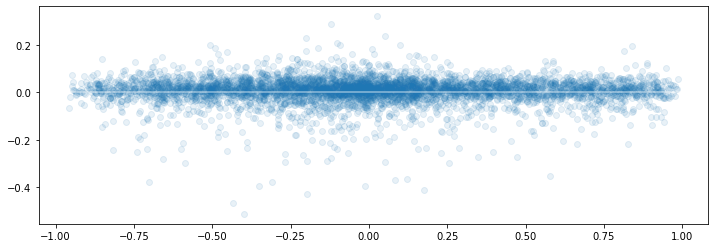

In [247]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(trades['greensft'], trades['result'], alpha=0.1)
# ax.set_xscale('log')
ax.axhline(0, c="white", alpha=0.5)

In [295]:
# t = trades[(trades['btc']<0.001) & (trades['btc']>-0.001)]
# t = trades[(trades['btc']>0.1) | (trades['btc']<-0.1)]
t = trades[trades['greensft']>0.9]

len(t)

74

In [318]:
trades[trades['result']<-0.05]

,trades,pret,target,result,green,total,btc,greensft
timestamp,,,,,,,,
2020-12-26 06:00:00,mith,0.079646,-0.057008,-0.082914,0.232955,176,0.000830,-0.304188
2020-12-27 00:00:00,mith,0.091428,-0.251531,-0.086944,0.244318,176,0.013096,-0.323864
2020-12-27 12:00:00,mith,0.091116,-0.138984,-0.051863,0.080000,175,-0.022165,-0.101818
2020-12-30 04:00:00,mith,0.127315,-0.060010,-0.069050,0.203390,177,-0.003630,-0.412429
2020-12-30 18:00:00,og,0.133953,-0.213567,-0.079320,0.561798,178,0.012683,-0.191011
...,...,...,...,...,...,...,...,...
2022-02-02 16:00:00,idex,0.152479,-0.263199,-0.210708,0.031802,283,-0.009734,-0.390184
2022-02-03 08:00:00,ooki,0.102777,-0.105071,-0.081658,0.725979,281,0.004161,-0.171184
2022-02-03 12:00:00,forth,0.235254,-0.090283,-0.066027,0.801418,282,0.008664,0.730496


In [313]:
hours = list(map(lambda x: x.hour, trades[trades['result']<-0.05].index))

In [314]:
from collections import Counter

In [315]:
hours = Counter(hours)

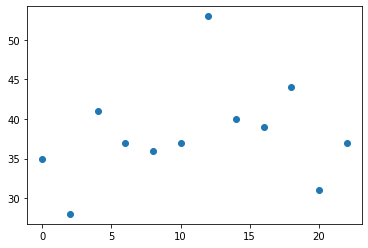

In [316]:
plt.scatter(hours.keys(), hours.values())

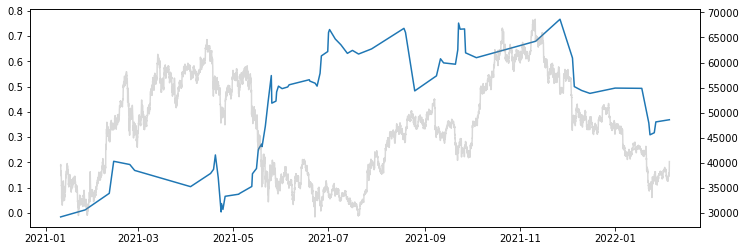

In [296]:
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(t.target.cumsum())
ax1 = ax.twinx()
ax1.plot(btc.loc[t.index[0]:t.index[-1]].close, alpha=0.3, color="gray")

In [297]:
print(f"mean: {round(100*trades.target.mean(), 2)}%, median: {round(100*trades.target.median(), 2)}%, winrate: {round(100*len(trades[trades.target>0].target)/len(trades), 2)}%")


mean: 1.04%, median: 1.83%, winrate: 65.46%


In [298]:
print(f"mean: {round(100*t.target.mean(), 2)}%, median: {round(100*t.target.median(), 2)}%, winrate: {round(100*len(t[t.target>0].target)/len(t), 2)}%, length: {len(t)}")

mean: 0.5%, median: 0.85%, winrate: 58.11%, length: 74


In [9]:
t = trades[-5000:-4000]

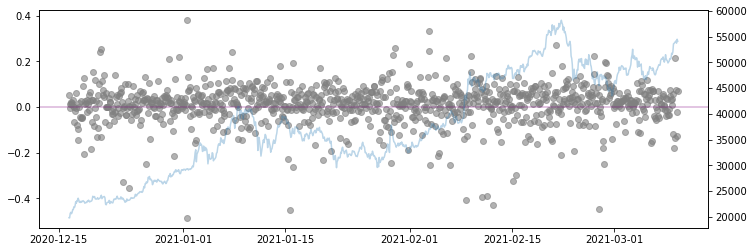

In [12]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(t.index, t.target, c="gray", alpha=0.6)
ax1 = ax.twinx()
ax1.plot(t.btc, alpha=0.3)
ax.axhline(0, alpha=0.3, c="purple")